# data loading

In [1]:
from yaml import safe_load
from haversine import haversine
import networkx as nx

data_path = 'data.yaml'

In [2]:
with open(data_path) as data_file:
    data = safe_load(data_file)

# for each country we store its list of neighbors and the location of its capital
europe = Graph({country: {neigh: haversine(info['loc'], data[neigh]['loc'])
                    for neigh in info['neighs']} for country, info in data.items()})

# for the purposes of many of these tasks we'll be using a maximum connected component
g = max(europe.connected_components_subgraphs(), key=Graph.order)

# networkx and sage both offer useful tools, so we'll be using them both
nxeur = europe.networkx_graph()
nxg = g.networkx_graph()

# a
## Statement
Prove that $G'$ is a planar by drawing it on a plane with no
intersection of edges.
## Solution

0: Albania
1: Andorra
2: Austria
3: Belarus
4: Belgium
5: Bosnia and Herzegovina
6: Bulgaria
7: Croatia
8: Cyprus
9: Czech Republic
10: Denmark
11: Estonia
12: Finland
13: France
14: Germany
15: Greece
16: Hungary
17: Iceland
18: Ireland
19: Italy
20: Kosovo
21: Latvia
22: Liechtenstein
23: Lithuania
24: Luxembourg
25: Malta
26: Moldova
27: Monaco
28: Montenegro
29: Netherlands
30: North Macedonia
31: Norway
32: Poland
33: Portugal
34: Romania
35: Russia
36: San Marino
37: Serbia
38: Slovakia
39: Slovenia
40: Spain
41: Sweden
42: Switzerland
43: Turkey
44: Ukraine
45: United Kingdom
46: Vatican City


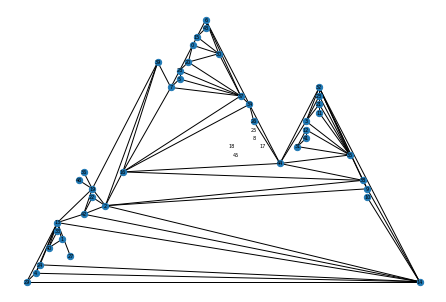

In [3]:
vs = europe.vertices()
labels = {v: str(i) for i,v in enumerate(vs)}
layout = nx.planar_layout(nxeur)
nx.draw(nxg, node_size=40, pos=layout)
nx.draw_networkx_labels(nxeur, pos=layout, labels=labels, font_size=5)
for i, v in enumerate(vs):
    print(f'{i}: {v}')

# b
## Statement
Find $|V|$, $|E|$, $\delta(G)$, $\Delta(G)$, $rad(G)$, $diam(G)$, $girth(G)$, $center(G)$, $\kappa(G)$, $\lambda(G)$.

## Definitions

$|V|$ is the number of vertices in $G$

$|E|$ is the number of edges in $G$

$\delta(G) = \min\limits_{v \in V}deg(v)$

$\Delta(G) = \max\limits_{v \in V}deg(V)$

$\varepsilon(v) = \max\limits_{u \in V}dist(v,u)$

$rad(G) = \min\limits_{v \ in V}\varepsilon(v)$

$diam(G) = \max\limits_{v \in V}\varepsilon(v)$

$girth(G)$ is the length of the shortest cycle in the $G$

$center(G) = \{v \in V \mid \varepsilon(v) = rad(G)\}$

$\kappa(G)$ is the minimum number of vertices, the removal of which would result in the number of connected components in $G$ to be greater than 1

$\lambda(G)$ is the minimum number of edges, the removal of which would result in the number of connected components in $G$ to  be greater than 1

## Solution

In [4]:
print(f'|V| = {g.order()}')

print(f'|E| = {g.size()}')

print(f'δ(G) = {min(g.degree())}')

print(f'Δ(G) = {max(g.degree())}')

print(f'rad(G) = {g.radius()}')

print(f'diam(G) = {g.diameter()}')

print(f'girth(G) = {g.girth()}')

print(f'center(G) = {g.center()}')

print(f'κ(G) = {g.vertex_connectivity()}')

print(f'λ(G) = {g.edge_connectivity()}')

|V| = 42
|E| = 88
δ(G) = 1
Δ(G) = 9
rad(G) = 5
diam(G) = 8
girth(G) = 3
center(G) = ['Switzerland', 'Slovakia', 'Germany', 'Belarus', 'Czech Republic', 'Poland', 'Slovenia', 'Russia', 'Croatia', 'Austria', 'Ukraine', 'Hungary']
κ(G) = 1
λ(G) = 1


# c

## Statement

Find the minimum vertex coloring $Z : V \rightarrow \mathbb{N}$ of $G$

## Definitions

A function $Z : V \rightarrow \mathbb{N}$ is a vertex coloring of $G$ *iff* $\forall (v,u) \in E : Z(v) \neq Z(u)$.

A vertex coloring is minimum *iff* $\max\limits_{v \in V}Z(v)$ is minimum

## Solution

Albania: 2
Andorra: 1
Austria: 4
Belarus: 2
Belgium: 4
Bosnia and Herzegovina: 1
Bulgaria: 1
Croatia: 2
Czech Republic: 3
Denmark: 1
Estonia: 2
Finland: 2
France: 3
Germany: 2
Greece: 3
Hungary: 1
Italy: 2
Kosovo: 1
Latvia: 1
Liechtenstein: 2
Lithuania: 3
Luxembourg: 1
Moldova: 1
Monaco: 1
Montenegro: 4
Netherlands: 1
North Macedonia: 4
Norway: 1
Poland: 1
Portugal: 1
Romania: 2
Russia: 4
San Marino: 1
Serbia: 3
Slovakia: 2
Slovenia: 3
Spain: 2
Sweden: 3
Switzerland: 1
Turkey: 2
Ukraine: 3
Vatican City: 1
4 colors


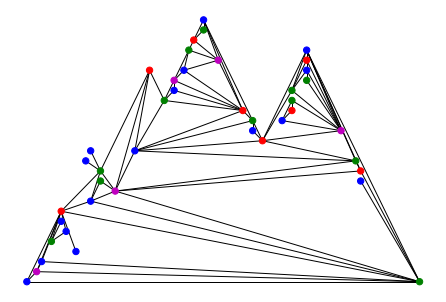

In [5]:
colors = g.coloring()
colormap = {}
for i, countries in enumerate(colors):
    for country in countries:
        colormap[country] = i+1
for country in g.vertices():
    print(f'{country}: {colormap[country]}')
print(f'{len(colors)} colors')

colorlist = 'bgrm'
nx.draw(nxg, node_color=[colorlist[colormap[v]-1] for v in nxg], node_size=40, pos=nx.planar_layout(nxg))

# d

## Statement

Find the minimum edge coloring $X : E \rightarrow \mathbb{N}$ of $G$

## Definitions

A function $X : E \rightarrow \mathbb{N}$ is an edge coloring of $G$ *iff* for any 2 adjacent edges $e_1, e_2 \in E$ : $X(e_1) \neq X(e_2)$

An edge coloring is minimum *iff* $\max\limits_{e \in E}X(e)$ is minimum

## Solution

In [6]:
from sage.graphs.graph_coloring import edge_coloring
colors = edge_coloring(g)
colormap = {}
for i, edges in enumerate(colors):
    for edge in edges:
        colormap[edge] = i
for v, u in g.edges(labels=False):
    print(f'{v} - {u}: {colormap[(v,u)]}')
print(f'{len(colors)} colors')

Albania - Greece: 0
Albania - Kosovo: 8
Albania - Montenegro: 1
Albania - North Macedonia: 2
Andorra - France: 8
Andorra - Spain: 0
Austria - Czech Republic: 3
Austria - Germany: 4
Austria - Hungary: 5
Austria - Italy: 0
Austria - Liechtenstein: 8
Austria - Slovakia: 1
Austria - Slovenia: 6
Austria - Switzerland: 2
Belarus - Latvia: 2
Belarus - Lithuania: 1
Belarus - Poland: 5
Belarus - Russia: 3
Belarus - Ukraine: 0
Belgium - France: 1
Belgium - Germany: 3
Belgium - Luxembourg: 8
Belgium - Netherlands: 0
Bosnia and Herzegovina - Croatia: 1
Bosnia and Herzegovina - Montenegro: 0
Bosnia and Herzegovina - Serbia: 2
Bulgaria - Greece: 2
Bulgaria - North Macedonia: 0
Bulgaria - Romania: 3
Bulgaria - Serbia: 5
Bulgaria - Turkey: 1
Croatia - Hungary: 3
Croatia - Montenegro: 2
Croatia - Serbia: 6
Croatia - Slovenia: 0
Czech Republic - Germany: 2
Czech Republic - Poland: 1
Czech Republic - Slovakia: 0
Denmark - Germany: 7
Estonia - Latvia: 1
Estonia - Russia: 4
Finland - Norway: 1
Finland - Ru

# e

## Statement

Find the maximum clique $Q \subseteq V$ of $G$

## Definitions

$Q \subseteq V$ is a clique of $G$ *iff* $\forall v,u \in Q : v = u \vee \{v,u\} \in E$

A clique is maximum by cardinality

## Solution

In [7]:
clique = g.clique_maximum()
print(clique)
print(f'{len(clique)} vertices')

['Lithuania', 'Belarus', 'Latvia', 'Russia']
4 vertices


# f

## Statement

Find the maximum stable set $S \subseteq V$ of $G$

## Definitions

$S \subseteq V$ is a stable set of $G$ *iff* $\forall v,u \in S : v = u \vee \{v,u\} \notin E$

A stable set is maximum by cardinality

## Solution

In [8]:
stable_set = g.independent_set()
print(stable_set)
print(f'{len(stable_set)} vertices')

['Moldova', 'Netherlands', 'Monaco', 'Bosnia and Herzegovina', 'Luxembourg', 'Vatican City', 'Sweden', 'Lithuania', 'Andorra', 'Albania', 'Czech Republic', 'Portugal', 'San Marino', 'Denmark', 'Slovenia', 'Estonia', 'Liechtenstein', 'Turkey']
18 vertices


# g

## Statement

Find the maximum matching $M  \subseteq E$ of $G$

## Definitions

$M \subseteq E$ is a matching of $G$ *iff* $\forall e_1,e_2 \in M : e_1 = e_2 \vee (e_1 \cap e_2) = \emptyset$

A matching is maximum by cardinality

## Solution

In [9]:
matching = g.matching(use_edge_labels=False)
print([(v,u) for v,u,w in matching])
print(f'{len(matching)} edges')

[('Slovakia', 'Ukraine'), ('Russia', 'Finland'), ('Poland', 'Czech Republic'), ('Lithuania', 'Belarus'), ('Montenegro', 'Kosovo'), ('Spain', 'Portugal'), ('Belgium', 'Luxembourg'), ('Norway', 'Sweden'), ('Andorra', 'France'), ('Albania', 'North Macedonia'), ('Latvia', 'Estonia'), ('Denmark', 'Germany'), ('Romania', 'Bulgaria'), ('Serbia', 'Bosnia and Herzegovina'), ('Croatia', 'Slovenia'), ('Liechtenstein', 'Switzerland'), ('Turkey', 'Greece'), ('Italy', 'San Marino'), ('Austria', 'Hungary')]
19 edges


# h

## Statement

Find the minimum vertex cover $R \subseteq V$ of $G$

## Definitions

$R \subseteq V$ is a vertex cover of $G$ *iff* $\forall e \in E : \exists v \in R : v \in e$

A vertex cover is minimum by cardinality

## Solutions

In [10]:
vertex_cover = g.vertex_cover()
print(vertex_cover)
print(f'{len(vertex_cover)} vertices')

['Switzerland', 'Slovakia', 'Bulgaria', 'Norway', 'Germany', 'Montenegro', 'Belarus', 'Belgium', 'France', 'Poland', 'Kosovo', 'Italy', 'Latvia', 'Russia', 'Croatia', 'North Macedonia', 'Austria', 'Greece', 'Romania', 'Finland', 'Serbia', 'Spain', 'Ukraine', 'Hungary']
24 vertices


# i

## Statement

Find the minimum edge cover $F \subseteq E$ of $G$

## Definitions

$F \subseteq E$ is an edge cover of $G$ *iff* $\forall v \in V : \exists e \in F : v \in e$

An edge cover is minimum by cardinality

## Explanation

We start with a maximum matching and add edges greedily to cover unmatched vertices

A proof of correctness can be found [here](https://cs.stackexchange.com/questions/110819/solving-the-min-edge-cover-using-the-maximum-matching-algorithm)

## Solution

In [11]:
cover = g.matching(use_edge_labels=False)
n = g.order()
vs = set().union(*[{v,u} for v,u,w in cover])
while len(vs) < n:
    for v,u,w in g.edges():
        if (v in vs) != (u in vs):
            vs.add(v)
            vs.add(u)
            cover.append((v,u,w))
print([(v,u) for v,u,w in cover])
print(f'{len(cover)} edges')

[('Slovakia', 'Ukraine'), ('Russia', 'Finland'), ('Poland', 'Czech Republic'), ('Lithuania', 'Belarus'), ('Montenegro', 'Kosovo'), ('Spain', 'Portugal'), ('Belgium', 'Luxembourg'), ('Norway', 'Sweden'), ('Andorra', 'France'), ('Albania', 'North Macedonia'), ('Latvia', 'Estonia'), ('Denmark', 'Germany'), ('Romania', 'Bulgaria'), ('Serbia', 'Bosnia and Herzegovina'), ('Croatia', 'Slovenia'), ('Liechtenstein', 'Switzerland'), ('Turkey', 'Greece'), ('Italy', 'San Marino'), ('Austria', 'Hungary'), ('Belgium', 'Netherlands'), ('France', 'Monaco'), ('Italy', 'Vatican City'), ('Moldova', 'Romania')]
23 edges


# j

## Statement

Find the shortest closed walk $W$ that visits every vertex of $G$

## Definitions

A hamiltonian cycle of $G$ is a cycle that contains all vertices.

The traveling salesman problem is the problem of finding the hamiltonian cycle of $G$ of minimum length (in the case of a weigted graph length is defined as the total weight of edges).

The distance graph of $G$ is a complete graph with the same vertice set, in which each edge has a weight equal to the distance between its endpoints in $G$.

## Explanation

The problem can be reduced to the traveling salesman problem on the distance graph of $G$.

After obtaining the minimum hamiltonian cycle of the distance graph, we replace every edge in it with the shortest path between its endpoints in $G$.

Here we use an approximate algorithm because the traveling salesman problem is apparently already too hard for my pc even with this
relatively small graph. the commented cell contains the exact evaluation that didn't finish in an hour for me

## Solution

In [12]:
# auxiliary functions used for path reconstruction
from itertools import tee
def pairwise(it):
    a,b = tee(it)
    next(b)
    return zip(a,b)

def path(v,u):
    p = [u]
    while p[-1] != v:
        p.append(ps[v][p[-1]])
    return p[::-1]

In [13]:
# ds, ps = g.shortest_path_all_pairs()
# h = Graph(ds)
# h.allow_loops(False)
# tsp = h.traveling_salesman_problem(use_edge_labels=True)
# ans_in_full = list(tsp.breadth_first_search('Russia'))+['Russia']
# ans = sum([path(v,u)[:-1] for v,u in pairwise(ans_in_full)], [])
# ans.append(ans[0])
# print(ans)
# print(f'{len(ans)-1} edges')

In [14]:
# note: starting node 2 (Austria) produces optimal results,
# set to False to skip all others and speed things up
check_all_starts = False

from ortools.constraint_solver import pywrapcp, routing_enums_pb2

vs = g.vertices()

n = g.order()
h = g.relabel(range(n), inplace=False)
ps = h.shortest_path_all_pairs()[1]
matrix = g.distance_matrix()


the_cycle = [-1]*n*2
for i in (range(n) if check_all_starts else [2]):
    manager = pywrapcp.RoutingIndexManager(int(n), int(1), int(i))
    routing = pywrapcp.RoutingModel(manager)

    def dist_callback(from_index, to_index):
        from_node = manager.IndexToNode(from_index)
        to_node = manager.IndexToNode(to_index)
        return matrix[from_node][to_node]

    transit_callback_index = routing.RegisterTransitCallback(dist_callback)
    routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)
    search_params = pywrapcp.DefaultRoutingSearchParameters()
    search_params.first_solution_strategy = routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC

    solution = routing.SolveWithParameters(search_params)
    ans_in_full = []
    index = routing.Start(int(0))
    while not routing.IsEnd(index):
        ans_in_full.append(manager.IndexToNode(index))
        index = solution.Value(routing.NextVar(index))
    ans_in_full.append(ans_in_full[0])

    ans = sum([path(v,u)[:-1] for v,u in pairwise(ans_in_full)], [])
    ans.append(ans[0])
    final_ans = list(map(vs.__getitem__, ans))
    the_cycle = min(the_cycle, final_ans, key=len)
print(the_cycle)
print(f'{len(the_cycle)-1} edges')

['Austria', 'Liechtenstein', 'Switzerland', 'Germany', 'Denmark', 'Germany', 'Luxembourg', 'Belgium', 'Netherlands', 'France', 'Monaco', 'France', 'Andorra', 'Spain', 'Portugal', 'Spain', 'France', 'Italy', 'San Marino', 'Italy', 'Vatican City', 'Italy', 'Slovenia', 'Croatia', 'Serbia', 'Bosnia and Herzegovina', 'Montenegro', 'Kosovo', 'North Macedonia', 'Albania', 'Greece', 'Turkey', 'Bulgaria', 'Romania', 'Moldova', 'Ukraine', 'Belarus', 'Lithuania', 'Latvia', 'Estonia', 'Russia', 'Finland', 'Sweden', 'Norway', 'Russia', 'Poland', 'Czech Republic', 'Slovakia', 'Hungary', 'Austria']
49 edges


# k

## Statement

Find the shortest closed walk $U$ that visits every edge of $G$

## Definitions

A eulerian circuit is a ciruit that visits each edge exactly once

## Explanation

In order solve this problem we can add parallel edges to the graph and then find a eulerian curcuit in the produced multigraph. Essentially we're reframing our question by saying that visiting the same edge several times is the same as visiting each of several parallel edges exactly once. The problem then becomes that of adding optimal parallel edges, which thankfully networkx is capable of.

## Solution

In [15]:
eul = list(nx.eulerian_circuit(nx.eulerize(nxg)))
print([q[0] for q in eul]+[eul[0][0]])
print(f'{len(eul)} edges')

['Moldova', 'Ukraine', 'Romania', 'Ukraine', 'Russia', 'Latvia', 'Estonia', 'Russia', 'Poland', 'Ukraine', 'Hungary', 'Serbia', 'Romania', 'Hungary', 'Croatia', 'Hungary', 'Austria', 'Slovenia', 'Hungary', 'Slovakia', 'Ukraine', 'Belarus', 'Poland', 'Belarus', 'Russia', 'Finland', 'Sweden', 'Norway', 'Finland', 'Norway', 'Russia', 'Lithuania', 'Belarus', 'Latvia', 'Lithuania', 'Poland', 'Czech Republic', 'Austria', 'Germany', 'Denmark', 'Germany', 'Poland', 'Slovakia', 'Austria', 'Italy', 'San Marino', 'Italy', 'Vatican City', 'Italy', 'France', 'Spain', 'Portugal', 'Spain', 'Andorra', 'France', 'Belgium', 'Germany', 'France', 'Monaco', 'France', 'Luxembourg', 'Germany', 'Netherlands', 'France', 'Luxembourg', 'Belgium', 'Netherlands', 'France', 'Switzerland', 'Germany', 'Czech Republic', 'Slovakia', 'Austria', 'Switzerland', 'Austria', 'Liechtenstein', 'Switzerland', 'Italy', 'Slovenia', 'Croatia', 'Serbia', 'North Macedonia', 'Greece', 'Albania', 'Kosovo', 'Serbia', 'Montenegro', 'Kos

# l

Find all 2-vertex-connected components (blocks) and draw a block-cut tree of $G^*$

## Definitions

A cut vertex is a vertex the removal of which splits the graph, increasing its number of connected components

A graph is 2-vertex-connected *iff* it contains no cut vertices.

A block of $G$ is a 2-vertex-connected subgraph of $G$ that is maximal by inclusion.

A block-cut tree of $G$ is a tree which has a vertex for each block and each cut vertex of $G$ and a edge connecting each pair of vertices corresponding to a cut vertex and a block for which the vertex is in the block

## Solution

B0: ('Andorra', 'France', 'Spain')
B1: ('Cyprus',)
B2: ('Denmark', 'Germany')
B3: ('France', 'Monaco')
B4: ('Iceland',)
B5: ('Ireland', 'United Kingdom')
B6: ('Italy', 'San Marino')
B7: ('Italy', 'Vatican City')
B8: ('Malta',)
B9: ('Moldova', 'Romania', 'Ukraine', 'Liechtenstein', 'Switzerland', 'Austria', 'France', 'Germany', 'Italy', 'Belgium', 'Netherlands', 'Bosnia and Herzegovina', 'Montenegro', 'Croatia', 'Serbia', 'Czech Republic', 'Slovakia', 'Poland', 'Hungary', 'Bulgaria', 'North Macedonia', 'Turkey', 'Greece', 'Luxembourg', 'Latvia', 'Lithuania', 'Belarus', 'Russia', 'Albania', 'Kosovo', 'Slovenia', 'Estonia')
B10: ('Norway', 'Russia', 'Finland', 'Sweden')
B11: ('Portugal', 'Spain')
C0: France
C1: Germany
C2: Italy
C3: Russia
C4: Spain


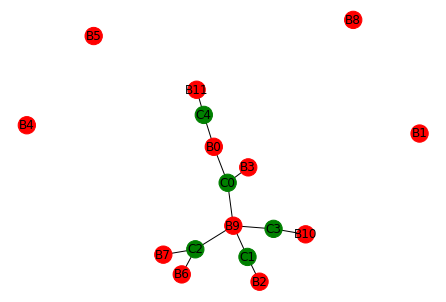

In [16]:
tree = europe.blocks_and_cuts_tree()
nxtree = tree.networkx_graph()
blocks = [v[1] for v in tree.vertices() if v[0]=='B']
q = {typ: [v for t,v in tree.vertices() if t==typ] for typ in 'BC'}
for typ, vs in q.items():
    for i, v in enumerate(vs):
        print(f'{typ}{i}: {v}')
nx.draw(nxtree, node_color=['r' if v[0]=='B' else 'g' for v in nxtree],
       labels={(typ, v): f'{typ}{q[typ].index(v)}' for typ,v in tree.vertices()})

# m

## Statement

Find all 2-edge-connected components of $G^*$

## Definitions

A bridge is an edge the removal of which splits the graph, increasing its number of connected components

A graph is 2-edge-connected *iff* it contains no bridges

A 2-edge-connected component of $G$ is a 2-edge-connected subgraph of $G$ that is maximal by inclusion

## Solution

In [17]:
for comp in nx.k_edge_components(nxeur, 2):
    print(list(comp))

['United Kingdom']
['Moldova', 'Switzerland', 'Netherlands', 'Slovakia', 'Bosnia and Herzegovina', 'Bulgaria', 'Norway', 'Luxembourg', 'Germany', 'Sweden', 'Lithuania', 'Andorra', 'Montenegro', 'Belarus', 'Czech Republic', 'Albania', 'Belgium', 'France', 'Poland', 'Kosovo', 'Italy', 'Slovenia', 'Estonia', 'Latvia', 'Russia', 'Croatia', 'Turkey', 'North Macedonia', 'Liechtenstein', 'Austria', 'Serbia', 'Romania', 'Finland', 'Greece', 'Spain', 'Ukraine', 'Hungary']
['Monaco']
['Vatican City']
['Malta']
['Ireland']
['Portugal']
['Cyprus']
['San Marino']
['Denmark']
['Iceland']


# n

## Statement

Construct an SPQR tree of the largest biconnected component of $G$

## Definitions

An SPQR tree is a tree representing the triconnected components of a biconnected graph, the exact structure of which is too long to explain here and can be found on [Wikipedia](https://en.wikipedia.org/wiki/SPQR_tree)

# Solution

S0: ['Estonia', 'Latvia', 'Russia']
S1: ['Austria', 'Liechtenstein', 'Switzerland']
S2: ['Bulgaria', 'Greece', 'Turkey']
S3: ['Moldova', 'Romania', 'Ukraine']
P0: ['Latvia', 'Russia']
P1: ['Poland', 'Ukraine']
P2: ['France', 'Germany']
P3: ['Austria', 'Switzerland']
P4: ['Bulgaria', 'Greece']
P5: ['Romania', 'Ukraine']
R0: ['Belarus', 'Latvia', 'Lithuania', 'Poland', 'Russia', 'Ukraine']
R1: ['Belgium', 'France', 'Germany', 'Luxembourg', 'Netherlands']
R2: ['Albania', 'Austria', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Czech Republic', 'France', 'Germany', 'Greece', 'Hungary', 'Italy', 'Kosovo', 'Montenegro', 'North Macedonia', 'Poland', 'Romania', 'Serbia', 'Slovakia', 'Slovenia', 'Switzerland', 'Ukraine']


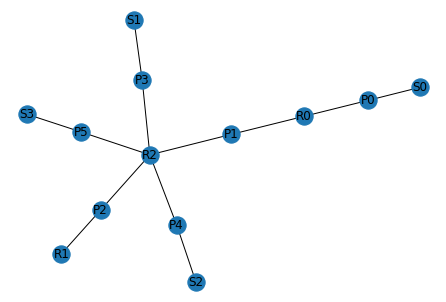

In [18]:
blocks = g.blocks_and_cut_vertices()[0]
mbcc = g.subgraph(max(blocks, key=len))
tree = mbcc.spqr_tree()
nxtree = tree.networkx_graph()
q = {t: [v for typ,v in nxtree if typ==t] for t in 'SPQR'}
for typ, vs in q.items():
    for i, v in enumerate(vs):
        print(f'{typ}{i}: {v.vertices()}')
nx.draw(nxtree, labels={(typ,v): f'{typ}{q[typ].index(v)}' for typ,v in nxtree})

# o


## Statement

Find the minimum (w.r.t. the total weight of edges) spanning tree $T$ for the maximum connected component of the weighted version of $G$

## Definition

A spanning tree of $G$ is a tree with the same vertex set as $G$

## Solution

22164.45282255872


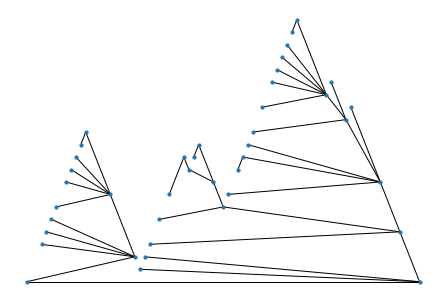

In [19]:
mst = g.subgraph(edges=g.min_spanning_tree())
print(sum(mst.edge_labels()))

nxmst = mst.networkx_graph()
nx.draw(nxmst, node_size=10, pos=nx.planar_layout(nxmst))

# p

## Statement

Find the $centroid(T)$ (w.r.t. the edge weight function).

## Definitions

A branch of a tree $T$ starting at one of its vertices $v$ is a subtree of $T$ in which $v$ has exactly one neighbor.

The centroid of a tree (w.r.t. edge weight) is the set of vertices with minimum weight, where we define the weight of a vertex to be the maximum total edge weight of a branch starting at that vertex

## Solution

In [20]:
def minimal(it, key=None):
    if key is None:
        key = lambda x: x
    lst = list(it)
    if lst:
        m = min(map(key, lst))
        return [x for x in lst if key(x) == m]
    return []

In [21]:
def getw(v):
    return max(sum(branch.edge_labels()) for branch in
               mst.cleave([v])[0]) if mst.degree(v) != 1 \
                                   else sum(mst.edge_labels())

print(minimal(mst.vertices(), key=getw))

['Hungary']


# q

## Statement

Construct the Prüfer code for $T$

## Definitions

The Prüfer code of a tree labeled with integers $\{1,2,...,n\}$ is a sequence of $n-2$ labels that uniquely identifies that tree.

## Solution

In [22]:
nxmst_copy = nx.relabel_nodes(nxmst, {v: i for i,v in enumerate(mst.vertices())})
print(nx.to_prufer_sequence(nxmst_copy))

[12, 40, 12, 7, 30, 2, 13, 31, 2, 31, 2, 31, 12, 12, 12, 17, 24, 31, 40, 36, 16, 30, 40, 15, 12, 16, 11, 31, 40, 2, 14, 0, 24, 7, 15, 22, 30, 15, 2, 16]
